# Internship Minor Project  
## Exploratory Analysis of NHANES Body Measurement Data

### Internship Details
- **Organization:** Corizo Edutech Pvt. Ltd.  
- **Intern Name:** Gaurav Aryan 
- **Project Type:** Minor Project (Data Analysis & Visualization)  
- **Dataset:** National Health and Nutrition Examination Survey (NHANES) 2020



### Project Objective
The objective of this project is to process, analyse, and visualise anthropometric (body measurement) data 
of adult male and female participants using Python. The analysis is performed on the NHANES dataset and 
focuses on understanding patterns and differences in body measurements across genders.

The key objectives of this project are to:
- Load and preprocess raw CSV data obtained from the NHANES dataset.
- Visualise the distribution of body measurements such as weight and height using histograms and boxplots.
- Compute health-related metrics including Body Mass Index (BMI), Waist-to-Height Ratio (WHtR), and 
  Waist-to-Hip Ratio (WHR).
- Analyse relationships between different body measurements using correlation analysis to identify 
  meaningful trends.

### Tools and Technologies
- **Programming Language:** Python 3.x 
- **Libraries Used:** Pandas, NumPy, Matplotlib, Seaborn
- **Development Environment:** Jupyter Notebook


## Importing Required Libraries
In this section, the required Python libraries are imported for data handling, numerical computation, 
and data visualisation.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import os
import nhanes as nh

# Set global visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Part 1: Data Acquisition and Preprocessing

### Objective
The objective of this section is to obtain the NHANES 2020 body measurement data for adult males and females 
and convert the relevant variables into NumPy matrices for further numerical analysis.

### Methodology
- **Data Retrieval:** The raw CSV files containing anthropometric measurements are obtained from the NHANES dataset.
- **Data Cleaning:** Non-data rows such as metadata comments are removed to ensure proper numerical processing.
- **Matrix Conversion:** Seven key body measurement variables are extracted and stored as NumPy matrices:
  - Weight (kg)
  - Standing Height (cm)
  - Upper Arm Length (cm)
  - Upper Leg Length (cm)
  - Arm Circumference (cm)
  - Hip Circumference (cm)
  - Waist Circumference (cm)


In [33]:
# --- STEP 1: DOWNLOAD ---
base_url = "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/"
filenames = ["nhanes_adult_male_bmx_2020.csv", "nhanes_adult_female_bmx_2020.csv"]

print("Downloading files...")
for filename in filenames:
    if not os.path.exists(filename):
        url = base_url + filename
        urllib.request.urlretrieve(url, filename)
        print(f"Saved: {filename}")
    else:
        print(f"File already exists: {filename}")

# --- STEP 2: READ AND PROCESS ---
# Using comment='#' to skip metadata lines
df_male = pd.read_csv("nhanes_adult_male_bmx_2020.csv", comment='#')
df_female = pd.read_csv("nhanes_adult_female_bmx_2020.csv", comment='#')

# Define specific columns to keep (in order)
cols = ['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST']

# Convert to Numpy matrices
male = df_male[cols].to_numpy()
female = df_female[cols].to_numpy()

print(f"\nMale matrix shape: {male.shape}")
print(f"Female matrix shape: {female.shape}")

File already exists: nhanes_adult_male_bmx_2020.csv
File already exists: nhanes_adult_female_bmx_2020.csv

Male matrix shape: (4081, 7)
Female matrix shape: (4221, 7)


## Part 2: Weight Distribution Analysis

### Objective
The objective of this section is to visualise and compare the distribution of body weight for adult female 
and male participants using histograms.

### Visualization Logic
To enable a fair and meaningful comparison between the two distributions, both histograms are displayed 
using identical x-axis limits. The axis range is determined based on the global minimum and maximum weight 
values across both datasets, ensuring consistent scaling and accurate visual interpretation.


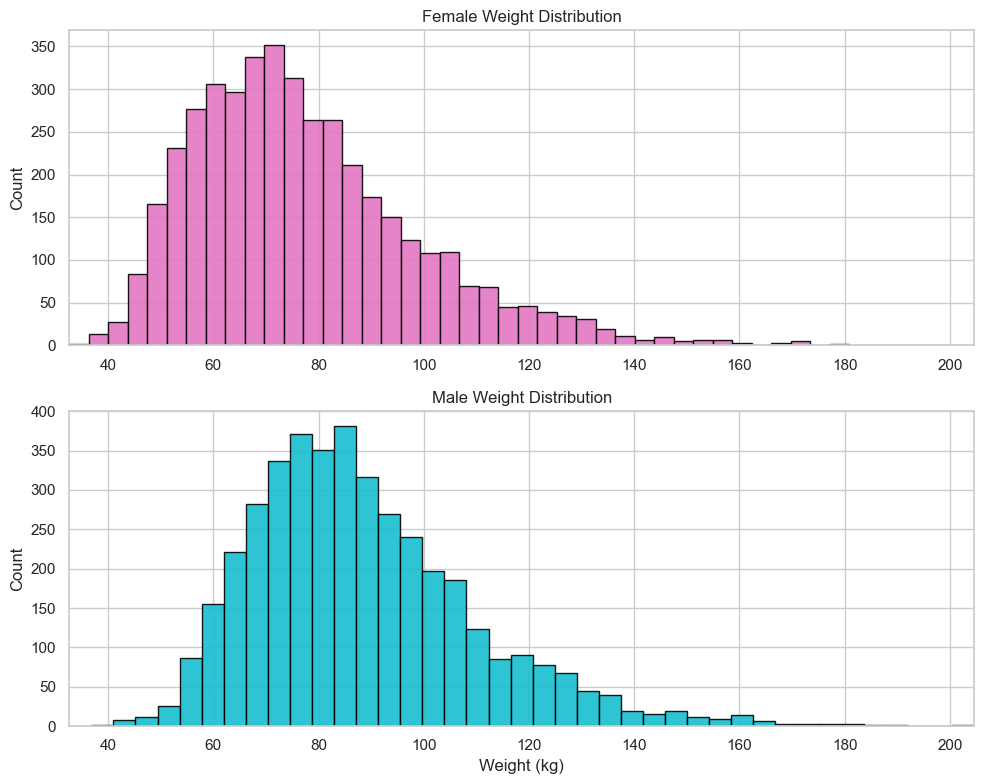

In [34]:
# 1. Clean data (Remove NaNs for plotting)
male_weights = male[:, 0][~np.isnan(male[:, 0])]
female_weights = female[:, 0][~np.isnan(female[:, 0])]

# 2. Determine global limits
global_min = min(np.min(male_weights), np.min(female_weights))
global_max = max(np.max(male_weights), np.max(female_weights))

# 3. Plot
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=40, color='tab:pink', edgecolor='black', alpha=0.9)
plt.title('Female Weight Distribution')
plt.xlim(global_min, global_max)
plt.ylabel('Count')

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=40, color='tab:cyan', edgecolor='black', alpha=0.9)
plt.title('Male Weight Distribution')
plt.xlim(global_min, global_max)
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Part 3: Comparative Boxplots

### Objective
The objective of this section is to compare the body weight distributions of male and female participants 
using side-by-side box-and-whisker plots. This visualisation highlights differences in central tendency, 
dispersion, and the presence of outliers between the two groups.

### Discussion of Results
- **Median:** The median body weight of male participants is noticeably higher than that of female 
  participants, indicating a generally higher central body mass among males in the dataset.
- **Skewness:** Both distributions exhibit positive (right) skewness, with longer tails extending 
  towards higher weight values, suggesting the presence of individuals with significantly higher body weight.
- **Outliers:** Several extreme values are observed in both groups, with some individuals exceeding 
  150 kg. These outliers indicate cases of severe obesity within the sampled population.


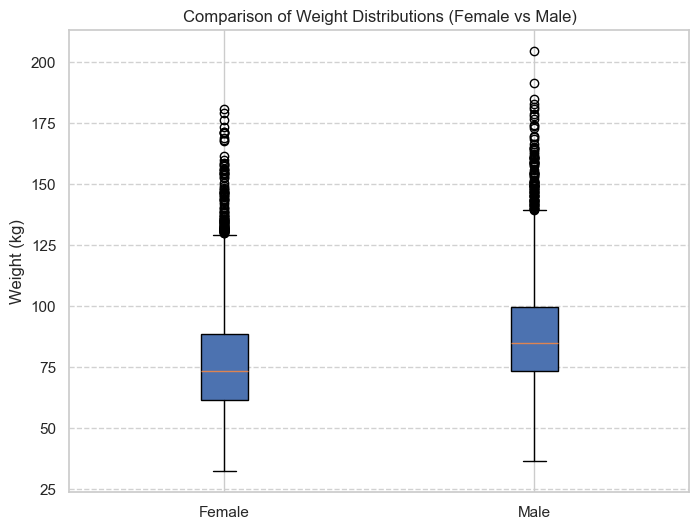

In [35]:
plt.figure(figsize=(8, 6))

# tick_labels is used for newer matplotlib versions
plt.boxplot([female_weights, male_weights], 
            tick_labels=['Female', 'Male'], 
            patch_artist=True)

plt.title('Comparison of Weight Distributions (Female vs Male)')
plt.ylabel('Weight (kg)')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

## Part 4: Statistical Aggregates

### Objective
The objective of this section is to compute key numerical measures describing the distributions of body weight 
for male and female participants. These measures include indicators of location (mean and median), dispersion 
(standard deviation), and shape (skewness and kurtosis).

### Observations
- **Skewness:** Positive skewness values are observed for both male and female weight distributions, confirming 
  that the data are right-skewed with longer tails towards higher weight values.
- **Mean vs Median:** In both distributions, the mean is greater than the median, which is a characteristic 
  feature of right-skewed data. This indicates that higher-weight observations and outliers have a noticeable 
  influence on the average body weight.


In [36]:
# Helper function to compute stats
def get_stats(data):
    s = pd.Series(data)
    return [s.mean(), s.median(), s.std(), s.min(), s.max(), s.skew(), s.kurtosis()]

stats_df = pd.DataFrame({
    'Male': get_stats(male_weights),
    'Female': get_stats(female_weights)
}, index=['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Skewness', 'Kurtosis'])

print(stats_df.round(3))

             Male   Female
Mean       88.365   77.404
Median     85.000   73.600
Std Dev    21.422   21.545
Min        36.800   32.600
Max       204.600  180.900
Skewness    0.985    1.034
Kurtosis    1.478    1.404


## Part 5: Feature Engineering and Standardisation

### Objective
The objective of this section is to enhance the female dataset by deriving additional health-related features 
and preparing the data for fair multivariate comparison through standardisation.

### Methodology
- **BMI Calculation:** Body Mass Index (BMI) is calculated for each female participant using weight and height 
  measurements. The computed BMI values are appended as an additional (eighth) column to the female data matrix.
- **Standardisation (Z-Scores):** A new matrix, `zfemale`, is created by converting each column of the female 
  dataset into z-scores. This transformation rescales the data so that each variable has a mean of zero and a 
  standard deviation of one.

### Purpose
Standardisation ensures that all variables are on a common scale, allowing meaningful comparison between 
measurements with different units and preventing any single variable from dominating subsequent analyses.


In [37]:
# --- Step 6: Add BMI to Female Matrix ---
# Weight is col 0, Height is col 1 (cm)
w = female[:, 0]
h_m = female[:, 1] / 100.0  # Convert to meters

bmi = w / (h_m ** 2)

# Reshape and append
female = np.column_stack((female, bmi))
print(f"Female matrix new shape (with BMI): {female.shape}")

# --- Step 7: Standardize (Z-Scores) ---
means = np.nanmean(female, axis=0)
stds = np.nanstd(female, axis=0)

zfemale = (female - means) / stds
print(f"Z-score matrix shape: {zfemale.shape}")

Female matrix new shape (with BMI): (4221, 8)
Z-score matrix shape: (4221, 8)


## Part 6: Correlation Analysis

### Objective
The objective of this section is to examine the relationships between selected standardised body measurements 
using a scatterplot matrix (pairplot) and correlation coefficients. Both Pearson’s and Spearman’s correlation 
measures are used to capture linear and monotonic associations between variables.

### Interpretation
- **Strong Correlations:** Body weight shows strong positive correlations with waist circumference, hip 
  circumference, and BMI. This is expected, as these variables are directly related to overall body mass 
  and fat distribution.
- **Weak Correlations:** Height exhibits a weak correlation with BMI, indicating that BMI effectively 
  adjusts body weight for height and reduces the direct influence of height on the metric.


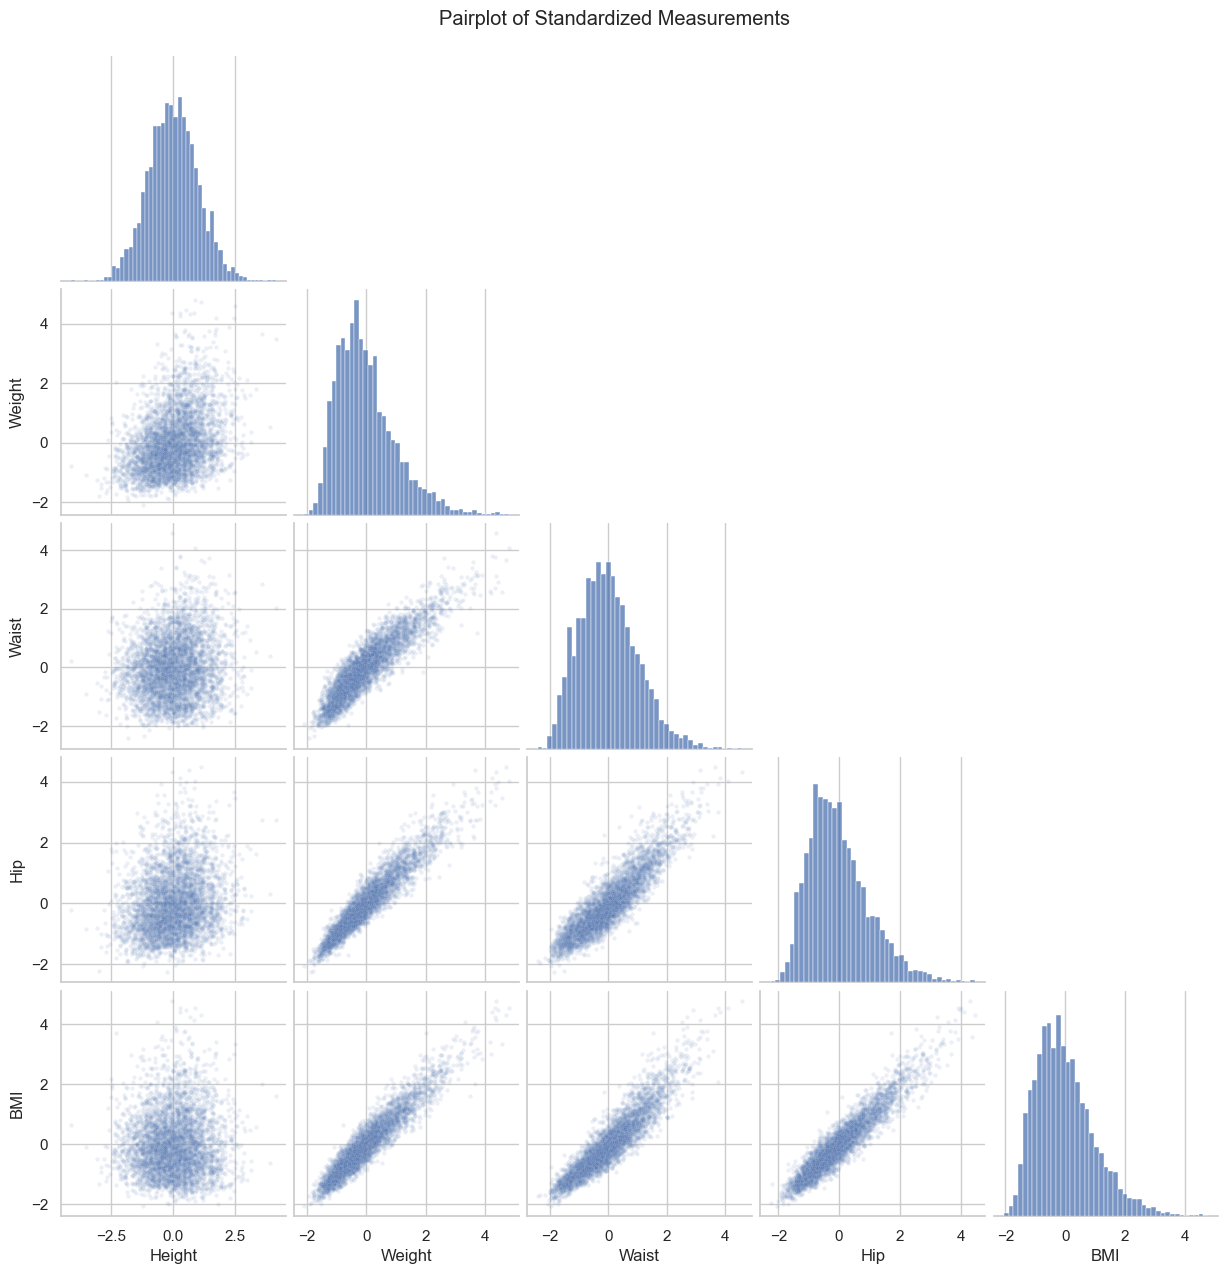

Pearson Correlation:
         Height  Weight  Waist   Hip   BMI
Height    1.00    0.35   0.13  0.20  0.03
Weight    0.35    1.00   0.90  0.95  0.95
Waist     0.13    0.90   1.00  0.90  0.92
Hip       0.20    0.95   0.90  1.00  0.94
BMI       0.03    0.95   0.92  0.94  1.00

Spearman Correlation:
         Height  Weight  Waist   Hip   BMI
Height    1.00    0.34   0.11  0.21  0.02
Weight    0.34    1.00   0.90  0.95  0.94
Waist     0.11    0.90   1.00  0.89  0.92
Hip       0.21    0.95   0.89  1.00  0.93
BMI       0.02    0.94   0.92  0.93  1.00


In [38]:
# Select cols: Height(1), Weight(0), Waist(6), Hip(5), BMI(7)
selected_indices = [1, 0, 6, 5, 7]
col_names = ['Height', 'Weight', 'Waist', 'Hip', 'BMI']

df_z = pd.DataFrame(zfemale[:, selected_indices], columns=col_names)

# Pairplot
sns.pairplot(df_z, plot_kws={'alpha': 0.1, 's': 10}, corner=True)
plt.suptitle('Pairplot of Standardized Measurements', y=1.02)
plt.show()

# Correlations
print("Pearson Correlation:\n", df_z.corr(method='pearson').round(2))
print("\nSpearman Correlation:\n", df_z.corr(method='spearman').round(2))

## Part 7: Advanced Body Ratios

### Objective
The objective of this section is to compute and compare additional body proportion metrics that are commonly 
used to assess fat distribution and health risk across male and female participants.

### Calculations
- **Waist-to-Height Ratio (WHtR):** Calculated as waist circumference divided by standing height.
- **Waist-to-Hip Ratio (WHR):** Calculated as waist circumference divided by hip circumference.

### Visual Analysis and Interpretation
- **Sex-Based Differences:** The box-and-whisker plots reveal a clear distinction in waist-to-hip ratio (WHR) 
  between male and female participants. Males generally exhibit higher WHR values, which is consistent with 
  a more centralised fat distribution pattern often described as an “apple-shaped” body profile. In contrast, 
  females tend to show lower WHR values, corresponding to a “pear-shaped” fat distribution.
- **Similarity in WHtR:** The waist-to-height ratio (WHtR) displays relatively similar distributions across 
  both genders, suggesting comparable overall proportionality of waist circumference relative to height.


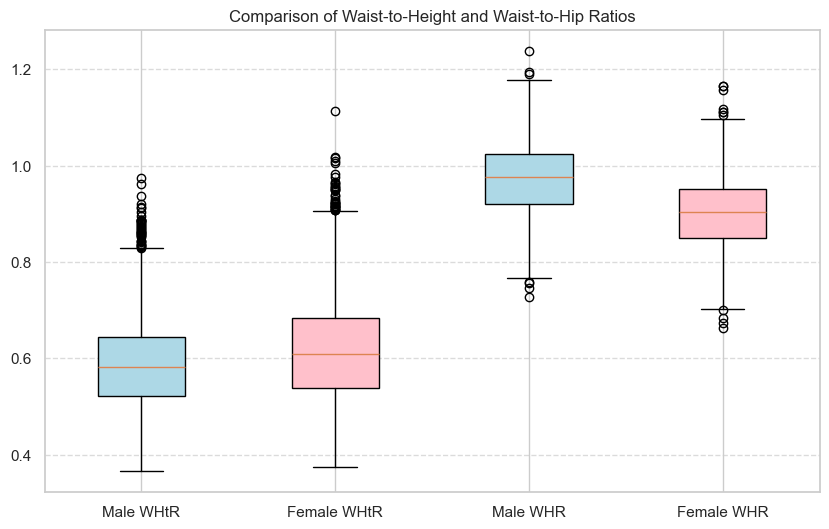

In [39]:
# --- Step 9: Compute Ratios ---
# Male: Waist(6), Height(1), Hip(5)
whtr_m = male[:, 6] / male[:, 1]
whr_m = male[:, 6] / male[:, 5]
male = np.column_stack((male, whtr_m, whr_m))

# Female: Waist(6), Height(1), Hip(5)
whtr_f = female[:, 6] / female[:, 1]
whr_f = female[:, 6] / female[:, 5]
female = np.column_stack((female, whtr_f, whr_f))

# --- Step 10: Boxplot Comparison ---
# Filter NaNs for plotting
data = [
    male[:, 7][~np.isnan(male[:, 7])],   # Male WHtR
    female[:, 8][~np.isnan(female[:, 8])], # Female WHtR
    male[:, 8][~np.isnan(male[:, 8])],   # Male WHR
    female[:, 9][~np.isnan(female[:, 9])]  # Female WHR
]

labels = ['Male WHtR', 'Female WHtR', 'Male WHR', 'Female WHR']
colors = ['lightblue', 'pink', 'lightblue', 'pink']

plt.figure(figsize=(10, 6))
bplot = plt.boxplot(data, tick_labels=labels, patch_artist=True)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Part 8: Theoretical Discussion

### Advantages and Limitations of Health Metrics

#### 1. Body Mass Index (BMI)
- **Advantages:** BMI is simple to compute, cost-effective, and widely accepted as a standard screening tool 
  for assessing body weight relative to height at a population level.
- **Limitations:** BMI does not differentiate between lean mass and fat mass and fails to account for fat 
  distribution, particularly visceral fat, which is more strongly associated with health risks.

#### 2. Waist-to-Height Ratio (WHtR)
- **Advantages:** WHtR is considered a better indicator of central obesity and cardiovascular risk compared 
  to BMI. It has been shown to be applicable across different age groups and ethnic populations.
- **Limitations:** The accuracy of WHtR depends on precise waist circumference measurement, which may be 
  subject to measurement error due to anatomical variability.

#### 3. Waist-to-Hip Ratio (WHR)
- **Advantages:** WHR effectively captures body fat distribution and distinguishes between different body 
  shapes, such as “apple-shaped” and “pear-shaped” profiles, which are linked to varying metabolic risks.
- **Limitations:** WHR may produce misleading results in cases where weight gain occurs proportionally in 
  both the waist and hip regions, potentially underestimating health risk in some individuals.


## Part 9: Outlier Analysis

### Objective
The objective of this section is to analyse the standardised body measurements of individuals with the 
lowest and highest Body Mass Index (BMI) values in the dataset in order to understand the extremities 
present within the population.

### Interpretation of Results
- **Lowest BMI Group:** Individuals with the lowest BMI values exhibit consistently negative z-scores for 
  key measurements such as weight, waist circumference, and hip circumference. This indicates that their 
  body measurements are substantially below the population mean.
- **Highest BMI Group:** Individuals with the highest BMI values display very large positive z-scores, 
  frequently exceeding +3.0. These extreme values suggest severe deviations from the average body 
  measurements, highlighting cases of extreme obesity within the dataset.


In [40]:
# Filter valid BMI rows (Col 7 in zfemale)
valid_rows = ~np.isnan(zfemale[:, 7])
zfemale_clean = zfemale[valid_rows]

# Sort by BMI
sorted_indices = np.argsort(zfemale_clean[:, 7])

# Select top 5 lowest and top 5 highest
indices = np.concatenate((sorted_indices[:5], sorted_indices[-5:]))
subset = zfemale_clean[indices]

# Display
col_names = ['Weight', 'Height', 'ArmL', 'LegL', 'ArmC', 'HipC', 'WaistC', 'BMI']
df_outliers = pd.DataFrame(subset[:, :8], columns=col_names)
df_outliers.insert(0, 'Category', ['Lowest BMI']*5 + ['Highest BMI']*5)

print(df_outliers.round(2))

      Category  Weight  Height  ArmL  LegL  ArmC  HipC  WaistC   BMI
0   Lowest BMI   -2.08   -1.22 -1.55 -1.17 -2.19 -2.04   -1.94 -2.05
1   Lowest BMI   -1.88   -0.19 -1.72  0.39 -2.44 -1.85   -2.06 -1.99
2   Lowest BMI   -1.54    1.81  0.63  0.57 -2.27 -1.68   -1.71 -1.97
3   Lowest BMI   -1.84   -0.26 -0.23  0.51 -2.30 -2.25   -1.86 -1.94
4   Lowest BMI   -1.61    0.89 -0.10  0.48 -2.21 -1.83   -1.71 -1.89
5  Highest BMI    4.25    0.29  1.86 -0.98  2.37  4.10    3.82  4.40
6  Highest BMI    4.46    0.50  1.69 -1.14  3.35  3.98    2.90  4.46
7  Highest BMI    4.35    0.28  2.84  1.94  4.37  3.92    3.75  4.51
8  Highest BMI    4.80    0.89  2.12  1.82  3.78  4.02    4.08  4.54
9  Highest BMI    4.36   -0.03 -0.06 -0.17  2.78  4.32    4.57  4.76


In [41]:
from IPython.display import HTML, display

html_code = """
<style>
    @import url('https://fonts.googleapis.com/css2?family=Inter:wght@400;600;700&display=swap');

    .final-container {
        position: relative;
        height: 520px;
        width: 100%;
        background: linear-gradient(145deg, #0f172a, #020617);
        border-radius: 20px;
        overflow: hidden;
        font-family: 'Inter', sans-serif;
        display: flex;
        justify-content: center;
        align-items: center;
        box-shadow: 0 15px 40px rgba(0,0,0,0.7);
    }

    .soft-glow {
        position: absolute;
        width: 140%;
        height: 140%;
        background: radial-gradient(circle at center, #1e3a8a, transparent 60%);
        opacity: 0.25;
        animation: slowFloat 18s linear infinite;
    }

    .content {
        z-index: 5;
        text-align: center;
        padding: 0 24px;
    }

    .check-icon {
        font-size: 54px;
        color: #38bdf8;
        margin-bottom: 18px;
    }

    h1 {
        font-size: 3.2em;
        font-weight: 700;
        margin: 0;
        color: #f8fafc;
        letter-spacing: -1px;
    }

    .subtitle {
        font-size: 1.15em;
        color: #cbd5f5;
        margin-top: 12px;
    }

    .footer {
        position: absolute;
        bottom: 0;
        width: 100%;
        padding: 18px 32px;
        background: rgba(255,255,255,0.04);
        backdrop-filter: blur(14px);
        display: flex;
        justify-content: space-between;
        align-items: center;
        border-top: 1px solid rgba(255,255,255,0.08);
        font-size: 0.95em;
    }

    .footer-left {
        color: #e2e8f0;
        font-weight: 600;
    }

    .footer-right {
        color: #cbd5f5;
    }

    .footer-right span {
        color: #f8fafc;
        font-weight: 700;
        margin-left: 6px;
    }

    @keyframes slowFloat {
        0% { transform: rotate(0deg) scale(1.1); }
        100% { transform: rotate(360deg) scale(1.1); }
    }

    @media (max-width: 768px) {
        h1 { font-size: 2.3em; }
        .subtitle { font-size: 1em; }
        .footer {
            flex-direction: column;
            gap: 6px;
        }
    }
</style>

<div class="final-container">
    <div class="soft-glow"></div>

    <div class="content">
        <div class="check-icon">✔</div>
        <h1>Project Completed</h1>
        <div class="subtitle">
            NHANES 2020 Data Analysis & Visualization
        </div>
    </div>

    <div class="footer">
        <div class="footer-left">
            Internship Minor Project — Corizo Edutech
        </div>
        <div class="footer-right">
            Prepared by <span>Gaurav Aryan</span>
        </div>
    </div>
</div>
"""

display(HTML(html_code))
